# [Judgment of handwritten digits.]

###  1. Read handwritten numeric data in scikit-learn.

------- 8 * 8 pixel data -------


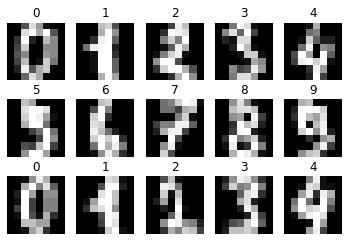

In [6]:
import matplotlib.pyplot as plt

#! Read handwritten numeric data.
from sklearn import datasets
digits = datasets.load_digits()
#! Output 15 items.
print("------- 8 * 8 pixel data -------")
for i in range(15):
    #! subplot() param: [row], [column], [number in the array.]
    plt.subplot(3, 5, i + 1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

###  2. Image format.
   - 0 (Transparent: black) -> 16 (Character part: white)

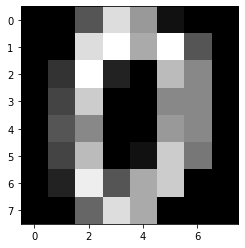

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

###  3. Machine learning of handwritten digit images.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

#! Read data.
digits = datasets.load_digits()
#! Separate data into pixel data and target data.
# Separate by CSV header name
x = digits.images
y = digits.target
#print("images\n", x)
#print("target\n",y)
#! Convert a two-dimensional array to a one-dimensional array.
x = x.reshape((-1, 64))

#! Divide into learning and testing.
# Separate 80% for learning and 20% for testing.(Shuffle=Sort the original data randomly.)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#!
#! Machine learning.
#!
# Create a classifier based on support vector machines.
clf = svm.LinearSVC()
# fit= Machine learning.
clf.fit(x_train, y_train)

#! Predict.(accuracy_score()=Calculation of accuracy rate.)
y_pred = clf.predict(x_test)
print("ACCURACY RATE : [ ", accuracy_score(y_test, y_pred), " ]")

ACCURACY RATE : [  0.9388888888888889  ]


C:\Users\konan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ・Save the learned data.

In [15]:
#! Save the learned data.
from sklearn.externals import joblib
joblib.dump(clf, "digits.pkl")

#! Read the learned data.
loaded_model = joblib.load("digits.pkl")

result = loaded_model.score(x_test, y_test)
print(result)

0.9388888888888889
